In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

In [4]:
def min_max_normalize(lst):
    """
        Helper function for movielens dataset, not useful for discrete multi class clasification.

        Return:
        Normalized list x, in range [0, 1]
    """
    maximum = max(lst)
    minimum = min(lst)
    toreturn = []
    for i in range(len(lst)):
        toreturn.append((lst[i]- minimum)/ (maximum - minimum))
    return toreturn

In [5]:
def z_standardize(X: pd.DataFrame):
    means = X.mean(axis=0)
    stds = X.std(axis=0)
    return (X - means) / stds

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [137]:
class Logistic_Regression():
    
    def __init__(self, alpha: float, iterations: int):
        self.alpha = alpha
        self.iterations = iterations

    def fit(self, X, y):
        self.X = X
        self.y = y.reshape(-1)
        self.theta = np.zeros(X.shape[1])
        
        return self.gradient_descent()

    def cost_function(self):
        z = self.X @ self.theta
        predict_1 = self.y * -np.log(sigmoid(z))
        predict_0 = (1 - self.y) * -np.log(1 - sigmoid(z))
        loss = predict_1 + predict_0
        return np.mean(loss)

    def gradient_descent(self):
        losses = []
        for i in range(self.iterations):
            z = self.X @ self.theta
            diff = sigmoid(z) - self.y
            gradient = self.X.T @ diff / self.X.shape[0]
            self.theta -= self.alpha * gradient
            loss = self.cost_function()
            losses.append(loss)

        return self.theta, losses

    def predict(self, X):
        return np.where(sigmoid(X @ self.theta) >= 0.5, 1, 0)
    
    # def __init__(self, alpha: float, iterations: int):
    #     self.alpha = alpha
    #     self.iterations = iterations
    
    # def fit(self, X: np.ndarray, y: np.ndarray):
    #     self.X = X
    #     self.y = y.reshape(-1)
    #     self.theta = np.zeros(X.shape[1])
    
    # def cost_function(self):
    #     print("sanity check")
    #     z = self.X @ self.theta
    #     predict_1 = self.y * -np.log(sigmoid(z))
    #     predict_0 = (1 - self.y) * -np.log(1 - sigmoid(z))
    #     loss = predict_1 + predict_0
    #     return np.mean(loss)
    
    # def gradient_descent(self):
    #     losses = []
    #     for iter in range(self.iterations):
    #         z = self.X @ self.theta
    #         gradient = self.X.T @ (sigmoid(z) - self.y) / self.X.shape[0]
    #         self.theta -= self.alpha * gradient
    #         loss = self.cost_function(self.X, self.y, self.theta)
    #         losses.append(loss)

    #     return losses

    # def predict(self, X):
    #     z = X @ self.theta
    #     return np.where(sigmoid(z) >= 0.5, 1, 0)
    
    
    
    #     # assumes y is normalized properly to 0 1
    #     # labels = np.unique(y_train)
    #     # self.y = np.vectorize(lambda x: 0 if x == min(labels) else 1)(y_train)
    #     # print(pd.Series(y_train).value_counts())
    #     # print(pd.Series(self.y).value_counts())
        
    #     # np.random.seed(42)
    #     # self.theta = np.random.uniform(low=-1, high=1, size=(X_train.shape[1], 1)) # assumes x is augmented
    #     # self.theta = np.random.uniform(low=-1, high=1, size=(X_train.shape[1] + 1, 1)) # beta included in theta for vectorization
        
    #     # return self

    # def gradient_descent(self, alpha, num_pass, early_stop=0, standardized = True):
        
    #     # if standardized:
    #     #     self.X = z_standardize(self.X)
    #     #     print(self.X.mean(axis=0))
    #     #     print(self.X.std(axis=0))
            
    #     # self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))
    #     # print(self.theta.shape, self.X.shape)
        
    #     self.losses = []
        
    #     for i in range(num_pass):
    #         matmul = self.X @ self.theta
    #         preds = 1 / (1 + np.exp(-matmul))
    #         branch1 = self.y * -np.log(preds)
    #         branch2 = (1 - self.y) * -np.log(1 - preds)
    #         losses = branch1 + branch2
    #         risk = np.mean(losses)
    #         # is the second neg necessary? should be? 
    #         self.losses.append(risk)
            
            
    #         # manual backward pass
    #         # g_risk = 1
    #         # g_losses = g_risk * (1 / self.X.shape[0]) * np.ones_like(losses)
    #         # g_branch1 = g_losses * 1
    #         # g_branch2 = g_losses * 1
    #         # g_preds = (
    #         #     g_branch1 * (1/preds) * -1 * self.y + 
    #         #     g_branch2 * -1 * (1/(1-preds)) * -1 * (1-self.y)
    #         # )
    #         # g_matmul = g_preds * -1 * np.exp(-matmul) * 1 * -(1 + np.exp(-matmul)) ** -2
    #         # g_theta = self.X.T @ g_matmul
            
    #         # fused operations
    #         g_theta = (1 / self.X.shape[0]) * self.X.T @ (preds - self.y)
            
    #         new_theta = self.theta - alpha * g_theta
    #         # new_preds = 1 / (1 + np.exp(-self.X @ new_theta))
    #         # new_losses = self.y * -np.log(new_preds) + (1 - self.y) * -np.log(1 - new_preds)
    #         # new_risk = (new_losses).mean()
            
    #         # if (abs(risk - new_risk) < early_stop) | (abs(abs(risk - new_risk) / risk) < early_stop):
    #         #     break
            
    #         self.theta = new_theta
            
    #         if i % 100 == 0:
    #             print(f'{i} Loss: {risk}')
            
    #     return self
    
    # def predict(self, X):
    #     preds = 1 / (1 + np.exp(-X @ self.theta))
    #     return np.where(preds > 0.5, 1, 0)

In [9]:
url_Wine = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
#names = ['f_acid', 'v_acid', 'c_acid', 'sugar', 'chlorides', 'f_SO2', 't_SO2', 'density', 'ph', 'sulphates', 'alcohol', 'quality']
wine = pd.read_csv(url_Wine, delimiter=';')

In [10]:
wine5 = wine.loc[wine.quality == 5]
wine6 = wine.loc[wine.quality == 6]
wineall = pd.concat([wine5,wine6])
wineall

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [11]:
X = np.array(wineall.iloc[:,:10])
Y = np.array(wineall.quality)

In [12]:
# import sklearn logistic regression
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

sklogistic = SKLogisticRegression(max_iter=1000, random_state=42).fit(X,Y)
sklogistic.score(X, Y)

0.6800606520090978

In [21]:
X_std = z_standardize(pd.DataFrame(X))
X_aug = np.hstack((np.ones((X.shape[0], 1)), X_std))
Y_norm = np.where(Y == 5, 0, 1)


In [43]:
# import sklearn logistic regression
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

sklogistic = SKLogisticRegression(max_iter=1000, random_state=42).fit(X_aug,Y_norm)
sklogistic.score(X_aug, Y_norm)

0.7050796057619408

In [44]:

regressor = Logistic_Regression().fit(X_aug, Y_norm)
regressor.gradient_descent(0.01, 10000, 0.0001, True)

0 Loss: 1.1131830902202695
100 Loss: 0.9900937749736771
200 Loss: 0.8950055671102505
300 Loss: 0.823096049576082
400 Loss: 0.7692137703235586
500 Loss: 0.7288262097109196
600 Loss: 0.6983836406330477
700 Loss: 0.6752363957552213
800 Loss: 0.6574395696952962
900 Loss: 0.6435940749368564
1000 Loss: 0.6327071894583094
1100 Loss: 0.6240687016781874
1200 Loss: 0.6171594299158337
1300 Loss: 0.6115922417625671
1400 Loss: 0.6070746359904644
1500 Loss: 0.6033835980043645
1600 Loss: 0.6003477872386392
1700 Loss: 0.5978346465644843
1800 Loss: 0.59574100495811
1900 Loss: 0.5939861550556892
2000 Loss: 0.5925066723993687
2100 Loss: 0.5912524790879504
2200 Loss: 0.5901838255081273
2300 Loss: 0.5892689699997982
2400 Loss: 0.5884823973977834
2500 Loss: 0.5878034542635171
2600 Loss: 0.5872153043544931
2700 Loss: 0.5867041282775685
2800 Loss: 0.5862585081908528
2900 Loss: 0.58586895230693
3000 Loss: 0.585527525026382
3100 Loss: 0.5852275571141096
3200 Loss: 0.5849634168347699
3300 Loss: 0.584730327816610

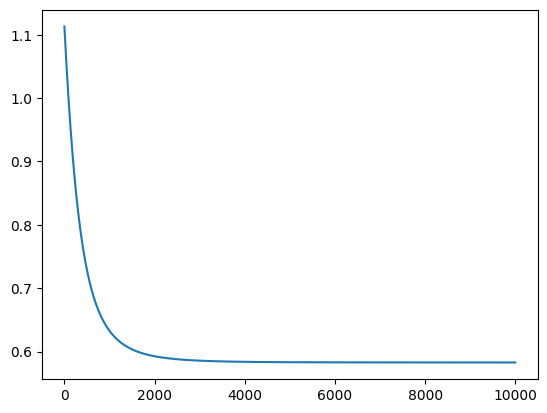

In [19]:
plt.plot(regressor.losses)

In [58]:
X_aug.shape, regressor.theta.shape

((1319, 11), (11, 1))

In [20]:
(regressor.predict(X_aug) == Y_norm).mean()

0.5016189005271414

In [384]:
logit = Logistic_Regression()
logit.fit(X, Y)

In [385]:
g = logit.gradient_descent_logistic(0.001, 1000)

In [386]:
w, b = g

In [387]:
g

(array([ 0.88920356, -0.39976005, -0.15986489,  0.33723283, -0.16076005,
         0.22245154, -0.61885986, -0.86668798,  0.43063254,  0.54169727]),
 -0.07735992361457411)

In [388]:
hat = np.array(w.dot(z_standardize(X).T) + b)

In [389]:
hat1 = sigmoid(hat)
hat1

array([0.31150064, 0.22190456, 0.26046789, ..., 0.7378107 , 0.66316566,
       0.62770556])

In [391]:
count = 0
for i in range(len(hat)):
    if hat1[i] < 0.5:
        if Y[i] == -1:
            count += 1
    else:
        if Y[i] == 1:
            count += 1
count

928

In [392]:
928/1319

0.7035633055344959

In [24]:
import numpy as np
import matplotlib.pyplot as plt

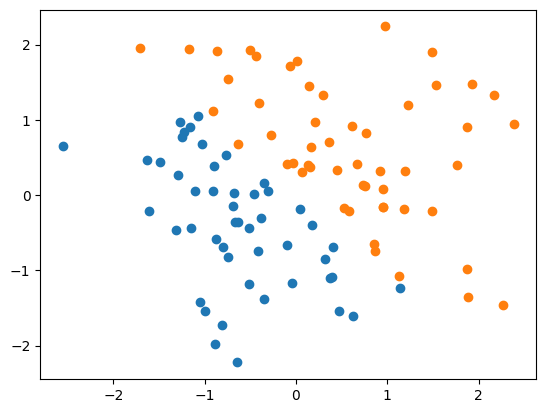

In [27]:
np.random.seed(0)  # For reproducibility

# Generate synthetic data
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(np.float32)  # Simple decision boundary

plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1')

In [46]:
X.shape, y.shape

((100, 2), (100,))

In [79]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, weights):
    z = np.dot(X, weights)
    predict_1 = y * -np.log(sigmoid(z))
    predict_0 = (1 - y) * -np.log(1 - sigmoid(z))
    loss = predict_1 + predict_0
    return np.mean(loss)

def gradient_descent(X, y, weights, learning_rate, iterations):
    cost_history = []

    for i in range(iterations):
        z = np.dot(X, weights)
        gradient = np.dot(X.T, (sigmoid(z) - y)) / len(X)
        weights -= learning_rate * gradient
        cost = cost_function(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history

def predict(X, weights):
    z = np.dot(X, weights)
    return [1 if i > 0.5 else 0 for i in sigmoid(z)]


weights = np.zeros(X_aug.shape[1])
learning_rate = 0.01
iterations = 10000

weights, cost_history = gradient_descent(X_aug, Y_norm.reshape(-1), weights, learning_rate, iterations)
predictions = predict(X_aug, weights)

print((predictions == Y_norm).mean())
print("Trained weights:", weights)

0.7081122062168309
Trained weights: [-0.08067466  0.77509493 -0.38166718 -0.11422489  0.31535888 -0.18238054
  0.24257237 -0.65215954 -0.79901522  0.37698587  0.53774887]


In [138]:
# weights = np.zeros(X_aug.shape[1])
lr = Logistic_Regression(0.01, 10000)
weights, cost_history = lr.fit(X_aug, Y_norm.reshape(-1))
# weights, cost_history = lr.gradient_descent(X_aug, Y_norm.reshape(-1), weights)
predictions = lr.predict(X_aug)

print((predictions == Y_norm).mean())

0.7081122062168309
